In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import json
from copy import deepcopy
import pandas as pd
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../../')
from style import style_setup

os.system('python ../style/style_setup.py')

0

In [2]:
path_to_RNNs = '/Users/tolmach/Documents/GitHub/rnn_coach/data/trained_RNNs/CDDMrelu'

In [3]:
subfolders = os.listdir(path_to_RNNs)
if ".DS_Store" in subfolders:
    subfolders.remove(".DS_Store")

In [10]:
int(subfolder.split("maxiter=")[1])

3000

In [19]:
scores = []
Ns = []
lmbdos = []
lmbdrs = []
maxiters = []
sigmas = []
n_stepss = []
for subfolder in subfolders:
    score = float(subfolder.split("_")[0])
    N = int(subfolder.split(";")[2].split("=")[1])
    lmbdo = float(subfolder.split("lmbdo=")[1].split(";")[0])
    lmbdr = float(subfolder.split("lmbdr=")[1].split(";")[0])
    maxiter = int(subfolder.split("maxiter=")[1])
    
    config_data = json.load(open(os.path.join(path_to_RNNs, subfolder, f"{score}_config.json"), 'rb+'))
    sigma = config_data["sigma_rec"]
    n_steps = config_data["n_steps"]
    
    scores.append(score)
    Ns.append(N)
    lmbdos.append(lmbdo)
    lmbdrs.append(lmbdr)
    maxiters.append(maxiter)
    sigmas.append(sigma)
    n_stepss.append(n_steps)

In [32]:
df = pd.DataFrame.from_dict({"score" : scores,
                             "N" : Ns,
                             "n_steps" : n_stepss,
                             "lmbdo" : lmbdos,
                             "lmbdr" : lmbdrs,
                             "maxiter" : maxiters,
                             "sigma" : sigmas,
                             "name" : subfolders})

In [34]:
filtered_values = np.where((df['lmbdr']==0.5) & (df['sigma'] == 0.05) & (df["n_steps"] == 300))[0]
df_filtered = df.loc[filtered_values].sort_values(by=['score'], ascending=True)

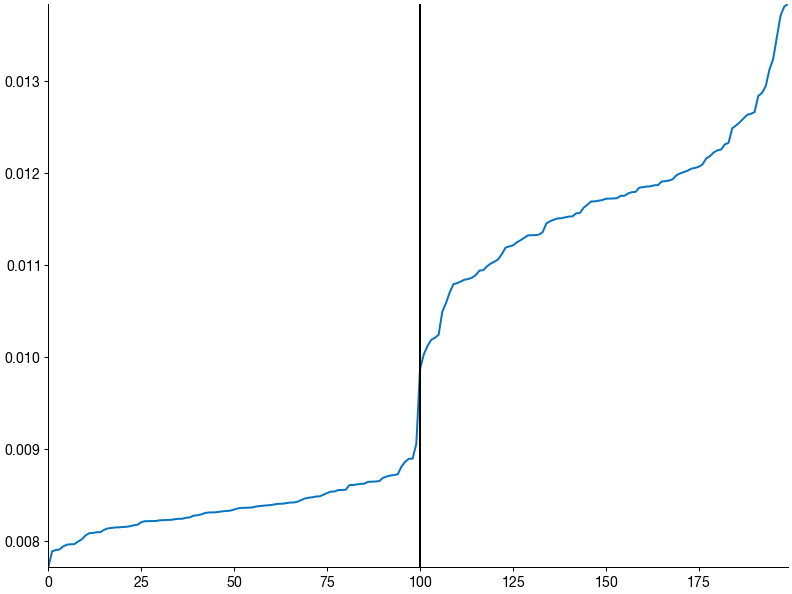

In [37]:
plt.plot(list(df_filtered["score"]))
plt.axvline(100)

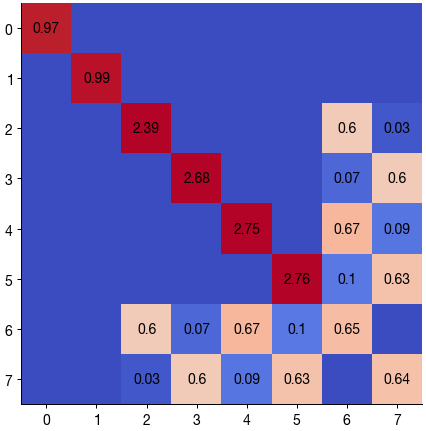

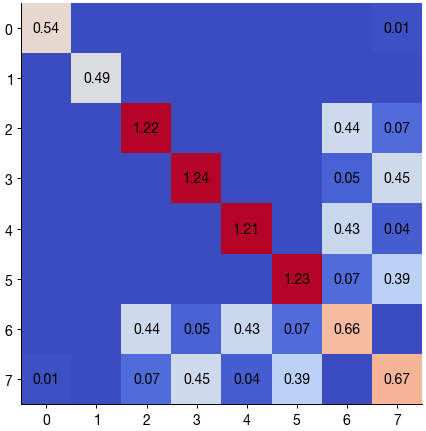

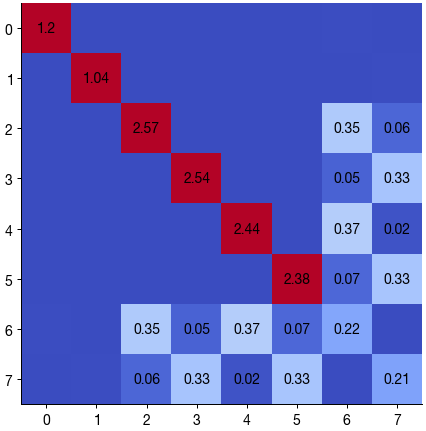

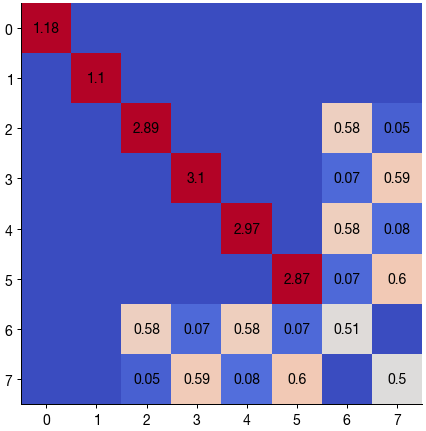

In [63]:
for k in [1, 50, 101, 150]:
    params = json.load(open(os.path.join(path_to_RNNs, subfolders[k], f"{scores[k]}_params_CDDM.json"), 'rb+'))
    W_out = np.array(params["W_out"])
    W_inp = np.array(params["W_inp"])
    mat = np.hstack([W_inp, W_out.T])
    mat = mat.T @ mat
    fig, ax = plt.subplots(1, 1, figsize = (3,3))
    ax.imshow(mat, cmap='coolwarm', vmin = 0, vmax = 1)
    
    for (i, j), z in np.ndenumerate(mat):
        if np.abs(z) > 0.01:
            ax.text(j, i, str(np.round(z, 2)), ha="center", va="center", color='k', fontsize=7)
    plt.show()

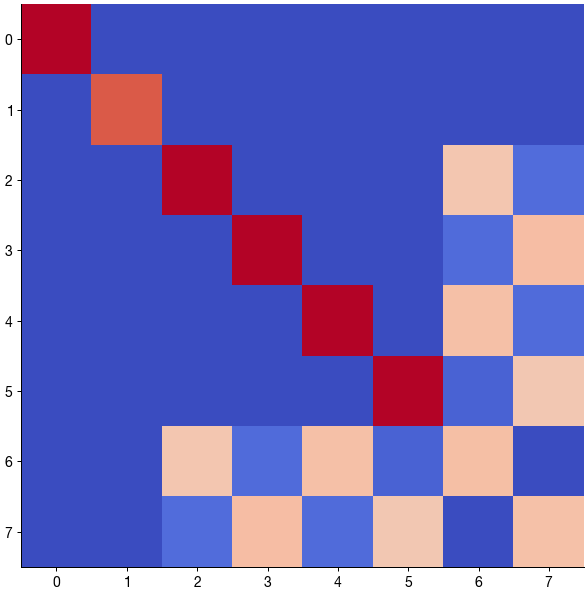